In [1]:
import pandas as pd


C:\Users\SOURABH\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\SOURABH\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("health_outcome_dataset.csv")
df.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [3]:
df.shape

(1235, 29)

In [4]:
df.isna().sum()

id                         0
surgery                    0
age                        0
hospital_number            0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       39
peripheral_pulse          60
mucous_membrane           21
capillary_refill_time      6
pain                      44
peristalsis               20
abdominal_distention      23
nasogastric_tube          80
nasogastric_reflux        21
nasogastric_reflux_ph      0
rectal_exam_feces        190
abdomen                  213
packed_cell_volume         0
total_protein              0
abdomo_appearance         48
abdomo_protein             0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
outcome                    0
dtype: int64

In [5]:
import pandas as pd
from sklearn.impute import SimpleImputer

df.drop('lesion_3', inplace = True, axis = 1)

# Create imputer objects
num_imputer = SimpleImputer(strategy='median')  # Imputer for numerical data
cat_imputer = SimpleImputer(strategy='most_frequent')  # Imputer for categorical data

# Define columns by type
num_cols = ['rectal_temp', 'pulse', 'respiratory_rate']  # Numerical columns
cat_cols = ['temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time',
            'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube',
            'nasogastric_reflux', 'abdomen', 'abdomo_appearance', 'rectal_exam_feces']  # Categorical columns

# Apply imputation
df[num_cols] = num_imputer.fit_transform(df[num_cols])
df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])

In [6]:
df['outcome'].value_counts()

outcome
lived         574
died          410
euthanized    251
Name: count, dtype: int64

#### Q1Pulse Rate Distribution
Context:
Analyzing the pulse rate distribution among horses with different health outcomes can provide critical insights into physiological states associated with various health conditions. This analysis can help veterinarians understand how pulse rate might correlate with the severity or type of condition a horse is facing.

Task:
Create a visual representation to analyze the pulse rate distribution across different health outcomes using the 'pulse' and 'outcome' columns in the dataset.

Question:
After analyzing the box plot representing the pulse rate distribution for different health outcomes, identify the correct statements regarding pulse rates.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# TODO: Group the dataframe by 'outcome' and calculate the average 'pulse' for each outcome category.
pulse_outcome_data = df.______  # Consider what function might summarize the data effectively.
print(pulse_outcome_data)

# Set a custom color palette (optional)
custom_palette = sns.color_palette("pastel")

# TODO: Utilize seaborn to create a box plot that shows variation within grouped data.
sns.boxplot(x=_____, y=______, data=df, palette=custom_palette)
plt.title('Pulse Rate Distribution by Health Outcome')
plt.xlabel('Health Outcome')
plt.ylabel('Pulse Rate')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to not cut off labels

plt.show()

AttributeError: 'DataFrame' object has no attribute '______'

In [9]:
df.groupby('outcome')['pulse'].mean().reset_index()

,outcome,pulse
0,died,90.207317
1,euthanized,86.573705
2,lived,68.918118


outcome
died          90.207317
euthanized    86.573705
lived         68.918118
Name: pulse, dtype: float64


C:\Users\SOURABH\AppData\Local\Temp\ipykernel_16560\3241666912.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='outcome', y='pulse', data=df, palette=custom_palette)
C:\Users\SOURABH\AppData\Local\Temp\ipykernel_16560\3241666912.py:13: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.boxplot(x='outcome', y='pulse', data=df, palette=custom_palette)


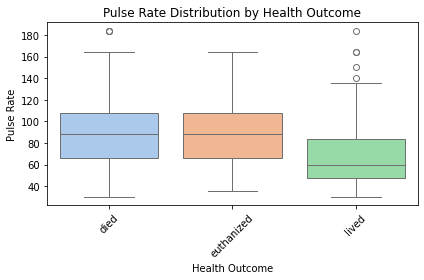

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by 'outcome' and calculate the mean pulse for each category
pulse_outcome_data = df.groupby('outcome')['pulse'].mean()

print(pulse_outcome_data)

# Set a custom color palette (optional)
custom_palette = sns.color_palette("pastel")

# Plotting using seaborn for a better box plot visual
sns.boxplot(x='outcome', y='pulse', data=df, palette=custom_palette)
plt.title('Pulse Rate Distribution by Health Outcome')
plt.xlabel('Health Outcome')
plt.ylabel('Pulse Rate')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to not cut off labels

plt.show()

#### Q2

Context:
Understanding how rectal temperature correlates with health outcomes in horses can provide valuable insights for veterinary treatment strategies. Rectal temperature is a critical clinical parameter and its deviations from the norm can indicate various health conditions.

Task:
Analyze the impact of different rectal temperature categories on health outcomes. The rectal temperatures will be categorized into hypothermia, normal, and fever to observe how these conditions correlate with health outcomes.

Question:
After analyzing the bar chart which depicts the count of health outcomes within each rectal temperature category, identify the correct statement regarding the correlation between rectal temperature categories and health outcomes.

In [11]:
def categorize_temp(temp):
    # TODO: Return the category based on temperature values (use if-elif-else structure).
    if temp < 37.5:
        return 'hypothermia'
    elif temp >= 37.5 and temp<=38.5:
        return 'normal'
    else:
        return 'fever'
    


# Apply function to create a new column
df['temp_category'] = df['rectal_temp'].apply(categorize_temp)  # TODO: Choose the appropriate DataFrame method to apply a function.

# Grouping data by temperature category and outcome for plotting
grouped_data = df.groupby(['temp_category','outcome']).count().reset_index()  # TODO: Group by two columns and count a unique identifier.


In [12]:
grouped_data

,temp_category,outcome,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,...,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,cp_data
0,fever,died,115,115,115,115,115,115,115,115,...,115,115,115,115,115,115,115,115,115,115
1,fever,euthanized,61,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,61,61
2,fever,lived,139,139,139,139,139,139,139,139,...,139,139,139,139,139,139,139,139,139,139
3,hypothermia,died,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72
4,hypothermia,euthanized,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,47
5,hypothermia,lived,53,53,53,53,53,53,53,53,...,53,53,53,53,53,53,53,53,53,53
6,normal,died,223,223,223,223,223,223,223,223,...,223,223,223,223,223,223,223,223,223,223
7,normal,euthanized,143,143,143,143,143,143,143,143,...,143,143,143,143,143,143,143,143,143,143
8,normal,lived,382,382,382,382,382,382,382,382,...,382,382,382,382,382,382,382,382,382,382


In [13]:
df

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,cp_data,outcome,temp_category
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,no,died,normal
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,no,euthanized,normal
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,no,lived,normal
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,yes,lived,hypothermia
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,yes,lived,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1230,yes,adult,535246,38.5,129.0,48.0,cool,reduced,pale_pink,...,57.0,66.0,serosanguious,2.0,yes,2206,0,no,lived,normal
1231,1231,yes,adult,528570,37.5,60.0,50.0,cool,reduced,pale_cyanotic,...,35.0,6.4,serosanguious,3.6,yes,2209,0,yes,died,normal
1232,1232,yes,young,529685,37.5,84.0,40.0,normal,reduced,normal_pink,...,40.0,5.9,cloudy,7.0,yes,400,0,yes,lived,normal
1233,1233,yes,adult,534784,38.1,70.0,16.0,normal,reduced,bright_red,...,58.0,74.0,cloudy,2.0,yes,2209,0,no,lived,normal


In [14]:
df.groupby(['temp_category', 'outcome']).size().reset_index(name='Count')

,temp_category,outcome,Count
0,fever,died,115
1,fever,euthanized,61
2,fever,lived,139
3,hypothermia,died,72
4,hypothermia,euthanized,47
5,hypothermia,lived,53
6,normal,died,223
7,normal,euthanized,143
8,normal,lived,382


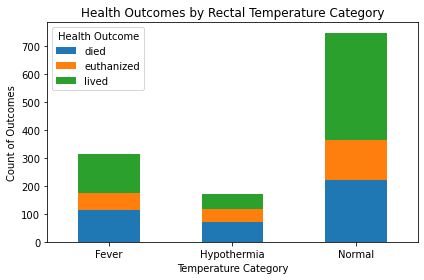

In [15]:
def categorize_temp(temp):
    if temp < 37.5:
        return 'Hypothermia'
    elif 37.5 <= temp <= 38.5:
        return 'Normal'
    else:
        return 'Fever'

# Apply function to create a new column
df['temp_category'] = df['rectal_temp'].apply(categorize_temp)

# Grouping data by temperature category and outcome for plotting
grouped_data = df.groupby(['temp_category', 'outcome']).size().reset_index(name='Count')

# Create a pivot table for easier plotting
pivot_table = grouped_data.pivot(index='temp_category', columns='outcome', values='Count').fillna(0)

# Plotting the data
pivot_table.plot(kind='bar', stacked=True)
plt.title('Health Outcomes by Rectal Temperature Category')
plt.xlabel('Temperature Category')
plt.ylabel('Count of Outcomes')
plt.xticks(rotation=0)
plt.legend(title='Health Outcome')
plt.tight_layout()  # Adjust layout to not cut off labels

plt.show()

In [16]:
pivot_table

outcome,died,euthanized,lived
temp_category,,,
Fever,115,61,139
Hypothermia,72,47,53
Normal,223,143,382


#### Q5
Context:
In statistical analysis for categorical data, the Chi-square test of independence is essential for determining the association between features. This test helps identify which features are statistically significant in relation to the outcome variable in a dataset.

Task:
Perform a Chi-square test of independence on each categorical feature against the 'outcome' variable to determine their significance in predicting health outcomes of horses. Given the significance level of 0.05, identify which feature is not significantly associated with the outcome.

Question:
Based on a significance level of 0.05, which feature was found to be not significantly associated with the 'outcome' variable, therefore failing the Chi-square test?

In [17]:
from scipy.stats import chi2_contingency  # TODO: Import the necessary function for performing the Chi-square test.

threshold = .05

print(f'{"Column":<25} | Test result')
print('----------------------------------------')

for column in cat_cols:
    # Create a contingency table
    contingency_table = pd.crosstab(df[column], df['outcome'])  # TODO: Create a contingency table from two categorical columns.

    # Perform the Chi-Square test
    chi2, p, dof, expected_freq = chi2_contingency(contingency_table)  # TODO: Apply the imported function to compute the Chi-square statistic and p-value.

    print(f'{column:<25} |   ', '\033[32mPassed' if p < threshold else '\033[31mFailed', '\033[0m')

Column                    | Test result
----------------------------------------
temp_of_extremities       |    Passed 
peripheral_pulse          |    Passed 
mucous_membrane           |    Passed 
capillary_refill_time     |    Passed 
pain                      |    Passed 
peristalsis               |    Passed 
abdominal_distention      |    Passed 
nasogastric_tube          |    Passed 
nasogastric_reflux        |    Passed 
abdomen                   |    Passed 
abdomo_appearance         |    Passed 
rectal_exam_feces         |    Passed 


#### Q6
Context:
In preparation for building a Gaussian Naive Bayes model to predict horse health outcomes, the initial step involves preprocessing the dataset. This includes dropping less relevant columns and applying appropriate transformations to the remaining data.

Task:
Prepare the data by dropping specified columns and applying transformations suitable for a Gaussian Naive Bayes model.

Question:
After preprocessing, which categorical feature ends up with the highest number of unique ordinal values?

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder  # TODO: Import necessary preprocessing classes.
from sklearn.compose import ColumnTransformer

# Drop unnecessary columns
df_temp = df.drop(['id'], axis=1)

# Identify numerical and categorical columns
numerical_cols = df_temp.select_dtypes(include=[int, float]).columns.tolist()  # TODO: Specify data types to select numerical (int and float both) columns.
categorical_cols = df_temp.select_dtypes(include=[object]).columns.tolist()  # TODO: Specify the data type for categorical(object).

# Remove the target column from the feature lists
categorical_cols.remove('outcome')

# Prepare target and features
X = df_temp.drop('outcome', axis=1)
y = df_temp['outcome']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # TODO: Use the appropriate function to split the data.

# Create transformers for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),  # TODO: Choose the correct transformer for numerical data.
        ('cat', OrdinalEncoder(), categorical_cols)  # TODO: Choose the correct transformer for categorical data that handles unknown categories.
    ])

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train)  # TODO: Fit and Apply the preprocessor to training data.
X_test = preprocessor.transform(X_test)  # TODO: Apply the preprocessor to test data.


print(f'{"Column":<25} | Number of unique values')
print('------'*10)
for i in categorical_cols:
    print(f'{i:<25} |   ', f'\033[32m{df[i].unique()}' , '\033[0m')


Column                    | Number of unique values
------------------------------------------------------------
surgery                   |    ['yes' 'no'] 
age                       |    ['adult' 'young'] 
temp_of_extremities       |    ['cool' 'cold' 'normal' 'warm'] 
peripheral_pulse          |    ['reduced' 'normal' 'absent' 'increased'] 
mucous_membrane           |    ['dark_cyanotic' 'pale_cyanotic' 'pale_pink' 'normal_pink' 'bright_pink'
 'bright_red'] 
capillary_refill_time     |    ['more_3_sec' 'less_3_sec' '3'] 
pain                      |    ['depressed' 'mild_pain' 'extreme_pain' 'alert' 'severe_pain' 'slight'] 
peristalsis               |    ['absent' 'hypomotile' 'normal' 'hypermotile' 'distend_small'] 
abdominal_distention      |    ['slight' 'moderate' 'none' 'severe'] 
nasogastric_tube          |    ['slight' 'none' 'significant'] 
nasogastric_reflux        |    ['less_1_liter' 'more_1_liter' 'none' 'slight'] 
rectal_exam_feces         |    ['decreased' 'absent' 'nor

#### Q7

Context:
Evaluating the performance of the Bernoulli Naive Bayes classifier not only through traditional classification metrics but also by analyzing the types of errors made can offer deeper insights into the model's behavior. A confusion matrix is particularly useful for this purpose as it visualizes the performance of an algorithm by showing the actual versus predicted classifications.

Task:
Generate a confusion matrix for the Bernoulli Naive Bayes model and analyze which outcome categories are most frequently misclassified.

Question:
According to the confusion matrix generated from the Bernoulli Naive Bayes model, which category is most frequently incorrectly predicted as "Euthanized"?

Bernoulli Naive Bayes Classification Report:
              precision    recall  f1-score   support

        Died       0.66      0.78      0.71        89
  Euthanized       0.55      0.67      0.60        42
       Lived       0.74      0.58      0.65       116

    accuracy                           0.66       247
   macro avg       0.65      0.67      0.65       247
weighted avg       0.68      0.66      0.66       247



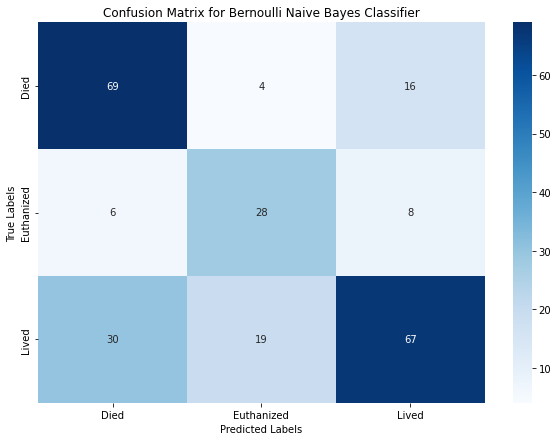

In [19]:
from sklearn.naive_bayes import BernoulliNB  # TODO: Correctly import the Bernoulli Naive Bayes classifier.
from sklearn.metrics import classification_report, confusion_matrix

# Encoding the 'outcome' variable
outcome_map = {'died': 0, 'euthanized': 1, 'lived': 2}
y_train_encoded = y_train.map(outcome_map)  # TODO: Apply the mapping to the 'y_train' series.
y_test_encoded = y_test.map(outcome_map)  # TODO: Apply the mapping to the 'y_test' series.

# Train Bernoulli Naive Bayes classifier
bernoulli_nb = BernoulliNB()
bernoulli_nb.fit(X_train, y_train_encoded)  # TODO: Fit the Bernoulli Naive Bayes model using training data.
y_pred_ber = bernoulli_nb.predict(X_test)  # TODO: Predict outcomes using the test set.

print("Bernoulli Naive Bayes Classification Report:")
print(classification_report(y_test_encoded, y_pred_ber, target_names=['Died', 'Euthanized', 'Lived']))  # TODO: Fill in the classification report with the appropriate arguments.

# Generate the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_ber)  # TODO: Provide the correct variables to generate the confusion matrix.
categories = ['Died', 'Euthanized', 'Lived']

# Plotting the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Bernoulli Naive Bayes Classifier')
plt.show()

In [20]:
df

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,cp_data,outcome,temp_category
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,no,died,Normal
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,no,euthanized,Normal
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,no,lived,Normal
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,yes,lived,Hypothermia
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,yes,lived,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,1230,yes,adult,535246,38.5,129.0,48.0,cool,reduced,pale_pink,...,57.0,66.0,serosanguious,2.0,yes,2206,0,no,lived,Normal
1231,1231,yes,adult,528570,37.5,60.0,50.0,cool,reduced,pale_cyanotic,...,35.0,6.4,serosanguious,3.6,yes,2209,0,yes,died,Normal
1232,1232,yes,young,529685,37.5,84.0,40.0,normal,reduced,normal_pink,...,40.0,5.9,cloudy,7.0,yes,400,0,yes,lived,Normal
1233,1233,yes,adult,534784,38.1,70.0,16.0,normal,reduced,bright_red,...,58.0,74.0,cloudy,2.0,yes,2209,0,no,lived,Normal


In [25]:
df.groupby(['mucous_membrane','outcome']).count()['id'].reset_index()

,mucous_membrane,outcome,id
0,bright_pink,died,32
1,bright_pink,euthanized,12
2,bright_pink,lived,44
3,bright_red,died,85
4,bright_red,euthanized,38
5,bright_red,lived,88
6,dark_cyanotic,died,61
7,dark_cyanotic,euthanized,30
8,dark_cyanotic,lived,30
9,normal_pink,died,31


In [27]:
df.groupby(['mucous_membrane', 'outcome']).count()['id'].reset_index()

,mucous_membrane,outcome,id
0,bright_pink,died,32
1,bright_pink,euthanized,12
2,bright_pink,lived,44
3,bright_red,died,85
4,bright_red,euthanized,38
5,bright_red,lived,88
6,dark_cyanotic,died,61
7,dark_cyanotic,euthanized,30
8,dark_cyanotic,lived,30
9,normal_pink,died,31


## NAIVE BAYES - 2

#### Q1

Context:
The condition of a horse's mucous membrane can provide valuable insights into its circulatory and respiratory health, which are critical factors in determining the overall health status. Analyzing how different conditions of mucous membranes correlate with health outcomes can help in early diagnosis and management of health issues.

Task:
Investigate the relationship between the condition of the mucous membrane and health outcomes in horses.

Instructions:
Group Data by Mucous Membrane Condition: Use the dataset to group entries by 'mucous_membrane' and 'outcome' to analyze the distribution of health outcomes within each mucous membrane condition category.
Visualize and Analyze Data: Create a bar chart to visualize the count of each health outcome within the different mucous membrane condition categories. This will help identify any significant correlations between mucous membrane condition and health outcomes.
Question:
After analyzing the bar chart which depicts the count of health outcomes within each mucous membrane condition category, identify the correct statement regarding the correlation between mucous membrane condition and health outcomes.

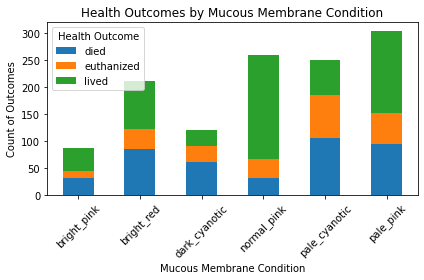

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Grouping data by mucous membrane condition and outcome for plotting
grouped_data = df.groupby(['mucous_membrane', 'outcome']).count()['id'].reset_index()
grouped_data.columns = ['Mucous Membrane Condition', 'Outcome', 'Count']

# Create a pivot table for visualization
pivot_table = pd.pivot_table(grouped_data, values='Count', index='Mucous Membrane Condition', columns='Outcome', fill_value=0)

# Plotting the data
pivot_table.plot(kind='bar', stacked=True)
plt.title('Health Outcomes by Mucous Membrane Condition')
plt.xlabel('Mucous Membrane Condition')
plt.ylabel('Count of Outcomes')
plt.xticks(rotation=45)
plt.legend(title='Health Outcome')
plt.tight_layout()  # Adjust layout to not cut off labels

plt.show()

#### Q2

Context:
After preprocessing the dataset for the "Predict Health Outcomes of Horses" and training a Gaussian Naive Bayes model, the next step is to evaluate the classifier’s performance. This involves encoding the target variable and analyzing the model's ability to predict each category.

Task:
Train and evaluate the Gaussian Naive Bayes classifier using the preprocessed features and encoded target. Use the classification report to identify which category the model has difficulty predicting.

Instructions:
Encode the Target Variable:
Map the 'outcome' categories to numeric values using the provided dictionary.
Model Training:
Train the Gaussian Naive Bayes classifier using the encoded training data.
Model Evaluation:
Evaluate the classifier's performance using the classification report to identify which category is most problematic.
Question:
Which category does the Gaussian Naive Bayes model struggle with the most, according to the classification report?

In [41]:
from sklearn.naive_bayes import GaussianNB  # TODO: Import the Gaussian Naive Bayes classifier.
from sklearn.metrics import classification_report, confusion_matrix  # TODO: Import necessary functions for evaluation.

# Encoding the 'outcome' variable
outcome_map = {'died': 0, 'euthanized': 1, 'lived': 2}
y_train_encoded = y_train.map(outcome_map)  # TODO: Apply the mapping to the 'y_train' series.
y_test_encoded = y_test.map(outcome_map)  # TODO: Apply the mapping to the 'y_test' series.

# Initialize and train Gaussian Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)  # TODO: Fit the model using the training data.

# Predict on the test set
y_pred = model.predict(X_test)  # TODO: Make predictions using the test data.

# Generate the classification report
report = classification_report(y_test, y_pred, target_names=['Died', 'Euthanized', 'Lived'])  # TODO: Provide the correct variables to generate the classification report.
print(report)

              precision    recall  f1-score   support

        Died       0.49      0.98      0.65        89
  Euthanized       0.56      0.57      0.56        42
       Lived       0.88      0.20      0.32       116

    accuracy                           0.54       247
   macro avg       0.64      0.58      0.51       247
weighted avg       0.69      0.54      0.48       247



#### Q3

Context:
Cross-validation is a robust technique for assessing the generalizability of a predictive model beyond the specific data used during training. Using 5-fold cross-validation with the Gaussian Naive Bayes classifier provides insight into the model's performance across different subsets of the dataset. The 'f1_weighted' scoring metric is particularly useful in scenarios with imbalanced classes or when a multiclass classification is involved.

Task:
Apply 5-fold cross-validation using the Gaussian Naive Bayes Classifier on the "Predict Health Outcomes of Horses" dataset, utilizing the 'f1_weighted' scoring metric to evaluate the model's performance.

Instructions:
Set Up Cross-Validation:

Use the Gaussian Naive Bayes classifier.
Implement 5-fold cross-validation.
Apply the 'f1_weighted' metric to measure model performance across folds.
Calculate the Average Score:

Determine the average 'f1_weighted' score across all cross-validation folds to assess the overall effectiveness of the model.
Question:
Using 5-fold cross-validation with the Gaussian Naive Bayes Classifier and the 'f1_weighted' scoring metric, what is the average score value?

Note: Learn more about different scoring parameters and "f1_weighted"

In [42]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

# Initialize the Gaussian Naive Bayes classifier
model = GaussianNB()

# Perform 5-fold cross-validation using the 'f1_weighted' scoring metric
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_weighted')

# Calculate the average of the cross-validation scores
average_score = cv_scores.mean()
print(f"Average f1 weighted score across 5 folds: {average_score:.2f}")

Average f1 weighted score across 5 folds: 0.50


#### Q4. Comparing Gaussian and Multinomial

Context:
After training a Gaussian Naive Bayes model on the "Predict Health Outcomes of Horses" dataset and obtaining its performance metrics, the next step involves evaluating a Multinomial Naive Bayes model. This evaluation will use the same dataset, but the continuous features will be scaled to non-negative values suitable for Multinomial Naive Bayes.

Task:
Evaluate the performance of the Multinomial Naive Bayes classifier after scaling the features to ensure all are non-negative, as required by the model.

Instructions:
Data Preparation:
Scale the continuous features using MinMaxScaler to ensure all feature values are non-negative.

Model Training and Evaluation:
- Train a Multinomial Naive Bayes classifier on the scaled data.
- Generate a classification report to assess the model's performance across different outcome categories.

Question:
Based on the classification report for the Multinomial Naive Bayes model, which category has the highest recall, indicating the best performance in correctly identifying true positive cases?

In [43]:
from sklearn.naive_bayes import MultinomialNB  # TODO: Correctly import the Multinomial Naive Bayes classifier.
from sklearn.preprocessing import MinMaxScaler  # TODO: Correctly import the MinMaxScaler for data normalization.

# Initialize MinMaxScaler
scaler = MinMaxScaler()  # TODO: Instantiate the scaler.

# Scale X_train and X_test
X_train_scaled = scaler.fit_transform(X_train)  # TODO: Fir and Apply the scaler to train data.
X_test_scaled = scaler.transform(X_test)  # TODO: Apply the scaler to test data.

# Train Multinomial Naive Bayes classifier
multinomial_nb = MultinomialNB()
multinomial_nb.fit(X_train_scaled, y_train)  # TODO: Fit the Multinomial Naive Bayes model to the scaled training data.
y_pred_multinomial = multinomial_nb.predict(X_test_scaled)  # TODO: Predict the test set results with the trained model.

print("Multinomial Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_multinomial, target_names=['Died', 'Euthanized', 'Lived']))  # TODO: Provide the correct arguments to generate the classification report.

Multinomial Naive Bayes Classification Report:
              precision    recall  f1-score   support

        Died       0.67      0.56      0.61        89
  Euthanized       0.62      0.57      0.59        42
       Lived       0.62      0.72      0.67       116

    accuracy                           0.64       247
   macro avg       0.64      0.62      0.62       247
weighted avg       0.64      0.64      0.63       247



### Q5

Context:
Laplace smoothing is a technique used to handle the issue of zero probability in Naive Bayes classifiers. While typically more relevant for discrete data in Multinomial and Bernoulli Naive Bayes, experimenting with this parameter in Gaussian Naive Bayes can provide insights into its effect on model robustness, particularly when handling datasets with sparse features or small sample sizes.

Task:
Determine the best Laplace smoothing parameter (alpha) for a Gaussian Naive Bayes classifier applied to the "Predict Health Outcomes of Horses" dataset. This involves tuning the alpha parameter to improve model performance, especially in handling data with potential zero-frequency issues.

Instructions:

- Setup Parameter Tuning:

Use a range of alpha values to determine which provides the best balance between bias and variance.
Apply cross-validation to evaluate each model configuration under different alpha settings.
- Evaluate Model Performance:

Measure the performance 'f1_weighted' of the Gaussian Naive Bayes classifier for each alpha setting.
Identify the alpha value that results in the highest average performance across cross-validation folds.
Implement and Discuss Results:

- Implement the model using the optimal alpha.

Discuss how Laplace smoothing impacts the performance of a Gaussian Naive Bayes classifier.
Question:
After tuning the Laplace smoothing parameter for the Gaussian Naive Bayes model on the "Predict Health Outcomes of Horses" dataset, which alpha value resulted in the highest f1_weighted score?

In [44]:
from sklearn.model_selection import GridSearchCV  # TODO: Import the necessary class for optimizing hyperparameters.
import numpy as np

# Define a range of alpha values to test
alpha_range = np.linspace(0.0, 1.0, 11)

# Setup GridSearchCV to find the best alpha
param_grid = {'var_smoothing': alpha_range}  # TODO: Specify the parameter name for Laplace smoothing in GaussianNB.
gnb = GaussianNB()
clf = GridSearchCV(gnb, param_grid, cv=5, scoring='f1_weighted')  # TODO: Fill in the GridSearchCV constructor with the correct model and parameters.
clf.fit(X_train, y_train)  # TODO: Fit the GridSearchCV to the training data.

# Best alpha and its score
best_alpha = clf.best_params_['var_smoothing']  # TODO: Extract the best alpha value from clf.
best_score = clf.best_score_  # TODO: Extract the best score from clf.
print(f"Best alpha: {best_alpha}")
print(f"Best scoring f1_weighted: {best_score:.2f}")

Best alpha: 0.8
Best scoring f1_weighted: 0.64


Learning Point:

- The task of tuning the Laplace smoothing parameter (var_smoothing) in the Gaussian Naive Bayes classifier demonstrates the importance of parameter optimization in statistical models, especially when dealing with datasets that might have zero-frequency issues.
- The var_smoothing parameter effectively adds a small constant to the variance of the feature, helping to manage features with zero variance and preventing overfitting.
- This example reveals how even a small adjustment to the alpha parameter can significantly impact model f1_weighted, underscoring the need for careful calibration of model parameters to achieve the best possible performance.
- Such optimizations are crucial for enhancing model robustness and ensuring reliable predictions, particularly in medical or biological datasets where precision is vital.

#### Q6

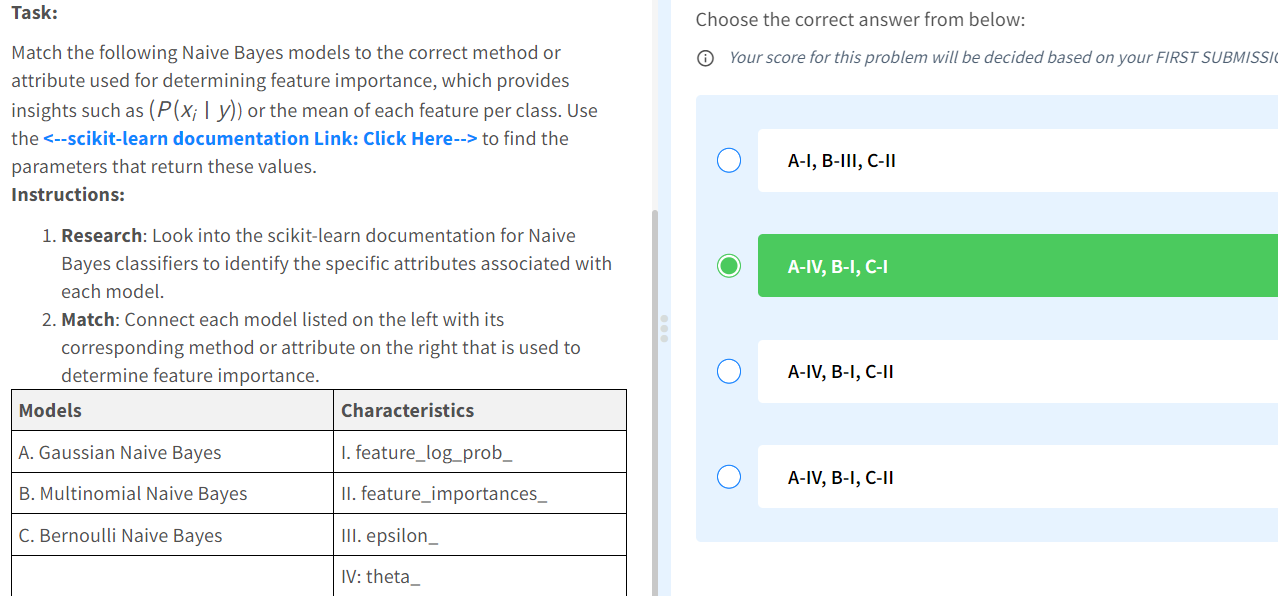


- Gaussian Naive Bayes typically uses attributes like theta_ and sigma_, where theta_ represents the mean of each feature per class. This attribute is crucial for understanding how the model assesses the likelihood of features given a particular class.

- Multinomial Naive Bayes utilizes feature_log_prob_, which gives the logarithm of the probability of each feature given a class. This is particularly useful for models dealing with discrete data where the frequency of occurrence matters.

- Bernoulli Naive Bayes also makes use of feature_log_prob_ since it is designed to handle binary/binary-like features. This attribute helps in calculating the log probability of features, crucial for binary classification tasks.

- The table also mentions epsilon_ and feature_importances_, which might not directly apply to standard implementations of Naive Bayes in scikit-learn. For instance, feature_importances_ is typically associated with tree-based models rather than

### Q7. Evaluating Feature Importance in Gaussian

Context:
Understanding which features most influence the predictions of a Gaussian Naive Bayes classifier can enhance interpretability and guide further model refinement. This model evaluates feature importance based on the mean values of features conditioned on each class, reflecting the significance of each feature in class discrimination.

Task:
Analyze feature importance in a Gaussian Naive Bayes model trained on a dataset, using the mean of each feature across classes to determine their impact on the model's predictions.

Instructions:
#### Model Setup and Training: 

- Initialize the Gaussian Naive Bayes model with var_smoothing set to 0.3 to stabilize the calculation by adjusting the variance of each feature.
- Train the model using the training sets X_train and y_train.

#### Feature Importance Calculation:

- Extract the mean of each feature for each class from the model. These means are critical as Gaussian Naive Bayes assumes features are normally distributed, and the mean of these distributions plays a significant role in class separation.
- Calculate the absolute values of these means to focus on the magnitude of feature values irrespective of their direction.

#### Summarize Feature Importance:

- Aggregate these mean values across all classes to get a single importance score per feature.
- Rank these features based on their importance scores to identify the most influential features.

#### Visualization:

Plot these importance scores using a horizontal bar chart to visually compare the significance of each feature.
Question:

After implementing the above steps, which features were identified as the most important based on the mean absolute values of the class conditional distributions?

Feature Importance based on absolute means of class conditional distributions:
nasogastric_reflux       9.280753
nasogastric_tube         7.883519
rectal_exam_feces        6.283186
abdomen                  5.429764
total_protein            4.273729
lesion_1                 4.077624
nasogastric_reflux_ph    4.060930
temp_category            4.019744
abdominal_distention     3.576991
packed_cell_volume       3.445872
abdomo_appearance        3.126263
surgical_lesion          2.817532
abdomo_protein           2.435875
lesion_2                 2.269796
pain                     2.148978
cp_data                  1.490977
temp_of_extremities      1.322135
hospital_number          1.001137
pulse                    0.996344
respiratory_rate         0.875340
peripheral_pulse         0.645351
surgery                  0.461029
rectal_temp              0.453910
peristalsis              0.166417
capillary_refill_time    0.142802
mucous_membrane          0.090701
age                      0.084035
Nam

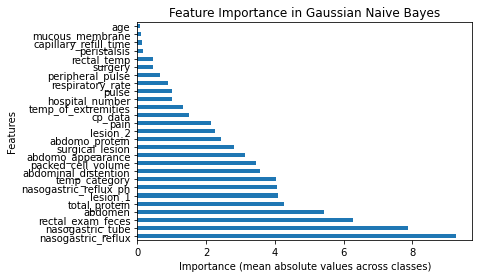

In [45]:
# Train the Gaussian Naive Bayes model
model = GaussianNB(var_smoothing = 0.3) # TODO: Set the smoothing parameter to 0.3.
model.fit(X_train, y_train)

# TODO: Use the appropriate numpy function to calculate the absolute values of the means
feature_importances = np.abs(model.theta_)   # TODO: Access the attribute that stores the class conditional means.

# Create a DataFrame to view these importances
importance_df = pd.DataFrame(feature_importances, columns=X.columns)

# Summing the importances across classes to get an overall importance score for each feature
importance_df.loc['Mean Importance'] = importance_df.sum(axis=0)  # TODO: Aggregate the means to get a single importance score per feature
sorted_importance = importance_df.loc['Mean Importance'].sort_values(ascending=False)   # TODO: Sort the features based on importance

print("Feature Importance based on absolute means of class conditional distributions:")
print(sorted_importance)

# Optionally, visualize these importances
import matplotlib.pyplot as plt
sorted_importance.plot(kind='barh')
plt.title('Feature Importance in Gaussian Naive Bayes')
plt.ylabel('Features')
plt.xlabel('Importance (mean absolute values across classes)')
plt.show()

Learning Point:

- This process underscores the significance of understanding feature influence within Gaussian Naive Bayes models.
- By focusing on the mean values conditioned on each class, which the model uses to calculate probabilities, we can gain insights into which features most significantly impact the model’s decisions.
- This approach allows for a nuanced interpretation of the model, facilitating better-informed decisions on feature relevance and potential model adjustments.
- Visualizing these importances further aids in comprehending the relative significance of each feature, supporting more strategic data-driven decisions in model refinement and application.